In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats 
%matplotlib inline
import matplotlib


In [2]:
tumor_data = pd.read_csv("clinicaltrial_data.csv")
tumor_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [9]:

drug_data = pd.read_csv("mouse_drug_data.csv")
drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [11]:

fourdrug_trial_df = trial_df.loc [(trial_df["Drug"] == "Capomulin") | (trial_df["Drug"] == "Infubinol") | (trial_df["Drug"] == "Ketapril") | (trial_df["Drug"] == "Placebo"), :]
fourdrug_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [12]:
Tumor_group_df = fourdrug_trial_df.groupby(['Drug','Timepoint'])
Tumor_sem_df = pd.DataFrame(Tumor_group_df ["Tumor Volume (mm3)"].sem())
Tumor_sem_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [16]:

Capomulin_yerr_df=Tumor_sem_df.loc['Capomulin',["Tumor Volume (mm3)"]]
Capomulin_yerr=Capomulin_yerr_df.iloc[:, 0].values
Capomulin_yerr

array([0.        , 0.44859285, 0.70268437, 0.83861725, 0.90973069,
       0.88164215, 0.93445951, 1.05224089, 1.22360839, 1.22397745])

In [17]:

Infubinol_yerr_df=Tumor_sem_df.loc['Infubinol',["Tumor Volume (mm3)"]]
Infubinol_yerr= Infubinol_yerr_df.iloc[:, 0].values
Infubinol_yerr

array([0.        , 0.2351023 , 0.28234591, 0.357705  , 0.47620951,
       0.55031457, 0.63106108, 0.98415494, 1.05521965, 1.14442738])

In [18]:

Ketapril_yerr_df=Tumor_sem_df.loc['Ketapril',["Tumor Volume (mm3)"]]
Ketapril_yerr= Ketapril_yerr_df.iloc[:, 0].values
Ketapril_yerr

array([0.        , 0.26481852, 0.35742126, 0.58026797, 0.72648382,
       0.75541275, 0.93412087, 1.12786718, 1.15844889, 1.45318648])

In [19]:
Placebo_yerr_df=Tumor_sem_df.loc['Placebo',["Tumor Volume (mm3)"]]
Placebo_yerr= Placebo_yerr_df.iloc[:, 0].values
Placebo_yerr

array([0.        , 0.21809078, 0.40206381, 0.61446144, 0.83960917,
       1.03487199, 1.21823118, 1.2874806 , 1.37063404, 1.3517256 ])

In [20]:
Tumor_mean_df = pd.DataFrame(Tumor_group_df ["Tumor Volume (mm3)"].mean())
Tumor_mean_df.reset_index(inplace=True)
Tumor_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [21]:
Capomulin_df=Tumor_mean_df.loc[Tumor_mean_df["Drug"]=="Capomulin",:]
Capomulin_df
rename_Capomulin_df = Capomulin_df.rename(columns={"Tumor Volume (mm3)":"Capomulin"})
rename_Capomulin_df.head()

,Drug,Timepoint,Capomulin
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [22]:
Infubinol_df=Tumor_mean_df.loc[Tumor_mean_df["Drug"]=="Infubinol",:]
Infubinol_df
rename_Infubinol_df = Infubinol_df.rename(columns={"Tumor Volume (mm3)":"Infubinol"})
rename_Infubinol_df.head()

,Drug,Timepoint,Infubinol
10,Infubinol,0,45.000000
11,Infubinol,5,47.062001
12,Infubinol,10,49.403909
13,Infubinol,15,51.296397
14,Infubinol,20,53.197691


In [23]:

Ketapril_df=Tumor_mean_df.loc[Tumor_mean_df["Drug"]=="Ketapril",:]
Ketapril_df
rename_Ketapril_df = Ketapril_df.rename(columns={"Tumor Volume (mm3)":"Ketapril"})
rename_Ketapril_df.head()

,Drug,Timepoint,Ketapril
20,Ketapril,0,45.000000
21,Ketapril,5,47.389175
22,Ketapril,10,49.582269
23,Ketapril,15,52.399974
24,Ketapril,20,54.920935


In [24]:

Placebo_df=Tumor_mean_df.loc[Tumor_mean_df["Drug"]=="Placebo",:]
Placebo_df
rename_Placebo_df = Placebo_df.rename(columns={"Tumor Volume (mm3)":"Placebo"})
rename_Placebo_df.head()

,Drug,Timepoint,Placebo
30,Placebo,0,45.000000
31,Placebo,5,47.125589
32,Placebo,10,49.423329
33,Placebo,15,51.359742
34,Placebo,20,54.364417


In [25]:

meger1_df=pd.merge(rename_Capomulin_df, rename_Infubinol_df, on="Timepoint")
meger1_df.head()

,Drug_x,Timepoint,Capomulin,Drug_y,Infubinol
0,Capomulin,0,45.000000,Infubinol,45.000000
1,Capomulin,5,44.266086,Infubinol,47.062001
2,Capomulin,10,43.084291,Infubinol,49.403909
3,Capomulin,15,42.064317,Infubinol,51.296397
4,Capomulin,20,40.716325,Infubinol,53.197691


In [26]:
meger2_df=pd.merge(rename_Ketapril_df, rename_Placebo_df, on="Timepoint")
meger2_df.head()

,Drug_x,Timepoint,Ketapril,Drug_y,Placebo
0,Ketapril,0,45.000000,Placebo,45.000000
1,Ketapril,5,47.389175,Placebo,47.125589
2,Ketapril,10,49.582269,Placebo,49.423329
3,Ketapril,15,52.399974,Placebo,51.359742
4,Ketapril,20,54.920935,Placebo,54.364417


In [27]:

merge3_df = pd.merge(meger1_df, meger2_df, on="Timepoint")
merge3_df.head()

,Drug_x_x,Timepoint,Capomulin,Drug_y_x,Infubinol,Drug_x_y,Ketapril,Drug_y_y,Placebo
0,Capomulin,0,45.000000,Infubinol,45.000000,Ketapril,45.000000,Placebo,45.000000
1,Capomulin,5,44.266086,Infubinol,47.062001,Ketapril,47.389175,Placebo,47.125589
2,Capomulin,10,43.084291,Infubinol,49.403909,Ketapril,49.582269,Placebo,49.423329
3,Capomulin,15,42.064317,Infubinol,51.296397,Ketapril,52.399974,Placebo,51.359742
4,Capomulin,20,40.716325,Infubinol,53.197691,Ketapril,54.920935,Placebo,54.364417


In [28]:

tumor_response_df=merge3_df[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
tumor_response_df

,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417
5,25,39.939528,55.715252,57.678982,57.482574
6,30,38.769339,58.299397,60.994507,59.809063
7,35,37.816839,60.742461,63.371686,62.420615
8,40,36.958001,63.162824,66.068580,65.052675
9,45,36.236114,65.755562,70.662958,68.084082


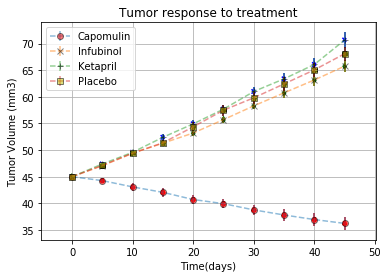

In [31]:
ax=tumor_response_df.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle='--', color='red', marker='o', yerr=Capomulin_yerr);
ax.errorbar(x=tumor_response_df['Timepoint'],y=tumor_response_df['Capomulin'], yerr=Capomulin_yerr, fmt='o', mfc='r', mec='k', ms=6, mew=1, linestyle='--',alpha=0.5, label="Capomulin" )
tumor_response_df.plot(kind='scatter', x='Timepoint', y='Infubinol', linestyle='--', color='DarkGreen', marker='d', yerr = Infubinol_yerr, ax=ax);
ax.errorbar(x=tumor_response_df['Timepoint'],y=tumor_response_df['Infubinol'], yerr=Infubinol_yerr, fmt='x', mfc='b', mec='k', ms=6, mew=1, linestyle='--', alpha=0.5, label="Infubinol")
tumor_response_df.plot(kind='scatter', x='Timepoint', y='Ketapril', linestyle='--', color='blue', marker='x',  yerr = Ketapril_yerr,  ax=ax);
ax.errorbar(x=tumor_response_df['Timepoint'],y=tumor_response_df['Ketapril'], yerr=Ketapril_yerr, fmt='+', mfc='g', mec='k', ms=6, mew=1, linestyle='--', alpha=0.5, label="Ketapril")
tumor_response_df.plot(kind='scatter', x='Timepoint', y='Placebo', linestyle='--', color='black', marker='s',  yerr = Placebo_yerr,  ax=ax);
ax.errorbar(x=tumor_response_df['Timepoint'],y=tumor_response_df['Placebo'], yerr=Placebo_yerr, fmt='s', mfc='y', mec='k', ms=6, mew=1, linestyle='--', alpha=0.5, label="Placebo")
xlim = ax.get_xlim()
factor = 0.1 
new_xlim = (xlim[0] + xlim[1])/2 + np.array((-0.5, 0.5)) * (xlim[1] - xlim[0]) * (1 + factor) 
ax.set_xlim(new_xlim)
ax.grid()
ax.set_xlabel("Time(days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.set_title("Tumor response to treatment")
legend = ax.legend(loc='best', shadow=True)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels )
plt.savefig("tumor_response_to_treatment.png")
plt.show()

In [ ]:

#Metastatic Response to Treatment

In [32]:

Metastasis_mean_df = pd.DataFrame(Tumor_group_df ["Metastatic Sites"].mean())
Metastasis_mean_df.reset_index(inplace=True)
Metastasis_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [33]:
Capomulin_df1=Metastasis_mean_df.loc[Metastasis_mean_df["Drug"]=="Capomulin",:]
Capomulin_df1
rename_Capomulin_df1 = Capomulin_df1.rename(columns={"Metastatic Sites":"Capomulin"})
rename_Capomulin_df1.head()

,Drug,Timepoint,Capomulin
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [34]:

Infubinol_df1=Metastasis_mean_df.loc[Metastasis_mean_df["Drug"]=="Infubinol",:]
Infubinol_df1
rename_Infubinol_df1 = Infubinol_df1.rename(columns={"Metastatic Sites":"Infubinol"})
rename_Infubinol_df1.head()

,Drug,Timepoint,Infubinol
10,Infubinol,0,0.000000
11,Infubinol,5,0.280000
12,Infubinol,10,0.666667
13,Infubinol,15,0.904762
14,Infubinol,20,1.050000


In [35]:

Ketapril_df1=Metastasis_mean_df.loc[Metastasis_mean_df["Drug"]=="Ketapril",:]
Ketapril_df1
rename_Ketapril_df1 = Ketapril_df1.rename(columns={"Metastatic Sites":"Ketapril"})
rename_Ketapril_df1.head()

,Drug,Timepoint,Ketapril
20,Ketapril,0,0.000000
21,Ketapril,5,0.304348
22,Ketapril,10,0.590909
23,Ketapril,15,0.842105
24,Ketapril,20,1.210526


In [36]:
Placebo_df1=Metastasis_mean_df.loc[Metastasis_mean_df["Drug"]=="Placebo",:]
Placebo_df1
rename_Placebo_df1 = Placebo_df1.rename(columns={"Metastatic Sites":"Placebo"})
rename_Placebo_df1.head()

,Drug,Timepoint,Placebo
30,Placebo,0,0.000000
31,Placebo,5,0.375000
32,Placebo,10,0.833333
33,Placebo,15,1.250000
34,Placebo,20,1.526316


In [37]:

meger1_df1=pd.merge(rename_Capomulin_df1, rename_Infubinol_df1, on="Timepoint")
meger1_df1.head()

,Drug_x,Timepoint,Capomulin,Drug_y,Infubinol
0,Capomulin,0,0.000000,Infubinol,0.000000
1,Capomulin,5,0.160000,Infubinol,0.280000
2,Capomulin,10,0.320000,Infubinol,0.666667
3,Capomulin,15,0.375000,Infubinol,0.904762
4,Capomulin,20,0.652174,Infubinol,1.050000


In [38]:

meger2_df1=pd.merge(rename_Ketapril_df1, rename_Placebo_df1, on="Timepoint")
meger2_df1.head()

,Drug_x,Timepoint,Ketapril,Drug_y,Placebo
0,Ketapril,0,0.000000,Placebo,0.000000
1,Ketapril,5,0.304348,Placebo,0.375000
2,Ketapril,10,0.590909,Placebo,0.833333
3,Ketapril,15,0.842105,Placebo,1.250000
4,Ketapril,20,1.210526,Placebo,1.526316


In [39]:

merge3_df1 = pd.merge(meger1_df1, meger2_df1, on="Timepoint")
merge3_df1.head()

,Drug_x_x,Timepoint,Capomulin,Drug_y_x,Infubinol,Drug_x_y,Ketapril,Drug_y_y,Placebo
0,Capomulin,0,0.000000,Infubinol,0.000000,Ketapril,0.000000,Placebo,0.000000
1,Capomulin,5,0.160000,Infubinol,0.280000,Ketapril,0.304348,Placebo,0.375000
2,Capomulin,10,0.320000,Infubinol,0.666667,Ketapril,0.590909,Placebo,0.833333
3,Capomulin,15,0.375000,Infubinol,0.904762,Ketapril,0.842105,Placebo,1.250000
4,Capomulin,20,0.652174,Infubinol,1.050000,Ketapril,1.210526,Placebo,1.526316


In [40]:

Metastatic_change_df=merge3_df1[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
Metastatic_change_df.head()

,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316


In [41]:
Metastasis_sem_df = pd.DataFrame(Tumor_group_df ["Metastatic Sites"].sem())
Metastasis_sem_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [42]:
Capomulin_yerr_df1=Metastasis_sem_df.loc['Capomulin',["Metastatic Sites"]]
Capomulin_yerr1=Capomulin_yerr_df1.iloc[:, 0].values
Capomulin_yerr1

array([0.        , 0.07483315, 0.12543258, 0.1320477 , 0.16162094,
       0.18181818, 0.17294359, 0.16949586, 0.17561037, 0.20259093])

In [43]:
Infubinol_yerr_df=Metastasis_sem_df.loc['Infubinol',["Metastatic Sites"]]
Infubinol_yerr1= Infubinol_yerr_df.iloc[:, 0].values
Infubinol_yerr1

array([0.        , 0.09165151, 0.15936381, 0.19401475, 0.23480115,
       0.26575279, 0.22782255, 0.22473329, 0.31446604, 0.30932024])

In [44]:

Ketapril_yerr_df1=Metastasis_sem_df.loc['Ketapril',["Metastatic Sites"]]
Ketapril_yerr1=Ketapril_yerr_df1.iloc[:, 0].values
Ketapril_yerr1

array([0.        , 0.09810019, 0.1420184 , 0.19138091, 0.23667961,
       0.28827503, 0.34746723, 0.36141782, 0.31572542, 0.27872199])

In [45]:
Placebo_yerr_df1=Metastasis_sem_df.loc['Placebo',["Metastatic Sites"]]
Placebo_yerr1=Placebo_yerr_df1.iloc[:, 0].values
Placebo_yerr1

array([0.        , 0.10094661, 0.11526068, 0.19022148, 0.23406428,
       0.26388762, 0.30026443, 0.34141179, 0.2972942 , 0.30424001])